In [79]:
import pandas as pd  
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [7]:
# Load dataset
url = "https://raw.githubusercontent.com/heijai01/coffee_shop_daily_avenue_prediction/refs/heads/main/data/coffee_shop_revenue.csv"
df = pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [8]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


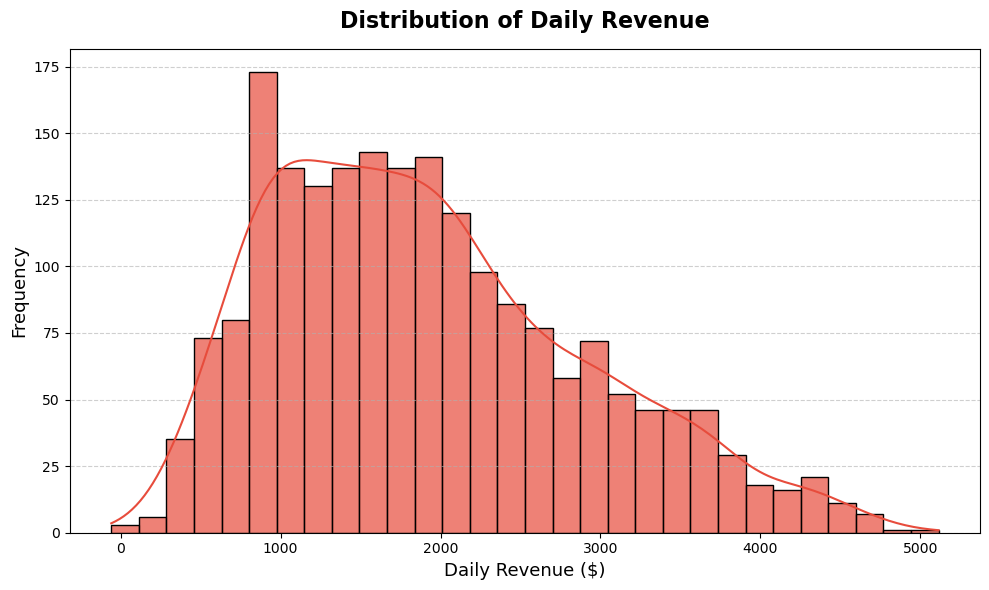

In [9]:
# Visualise the distribution of daily revenue

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Daily_Revenue',
    bins=30,
    color='#E74C3C',    
    kde=True,            
    edgecolor='black',   
    alpha=0.7            
)

plt.title('Distribution of Daily Revenue', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Daily Revenue ($)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

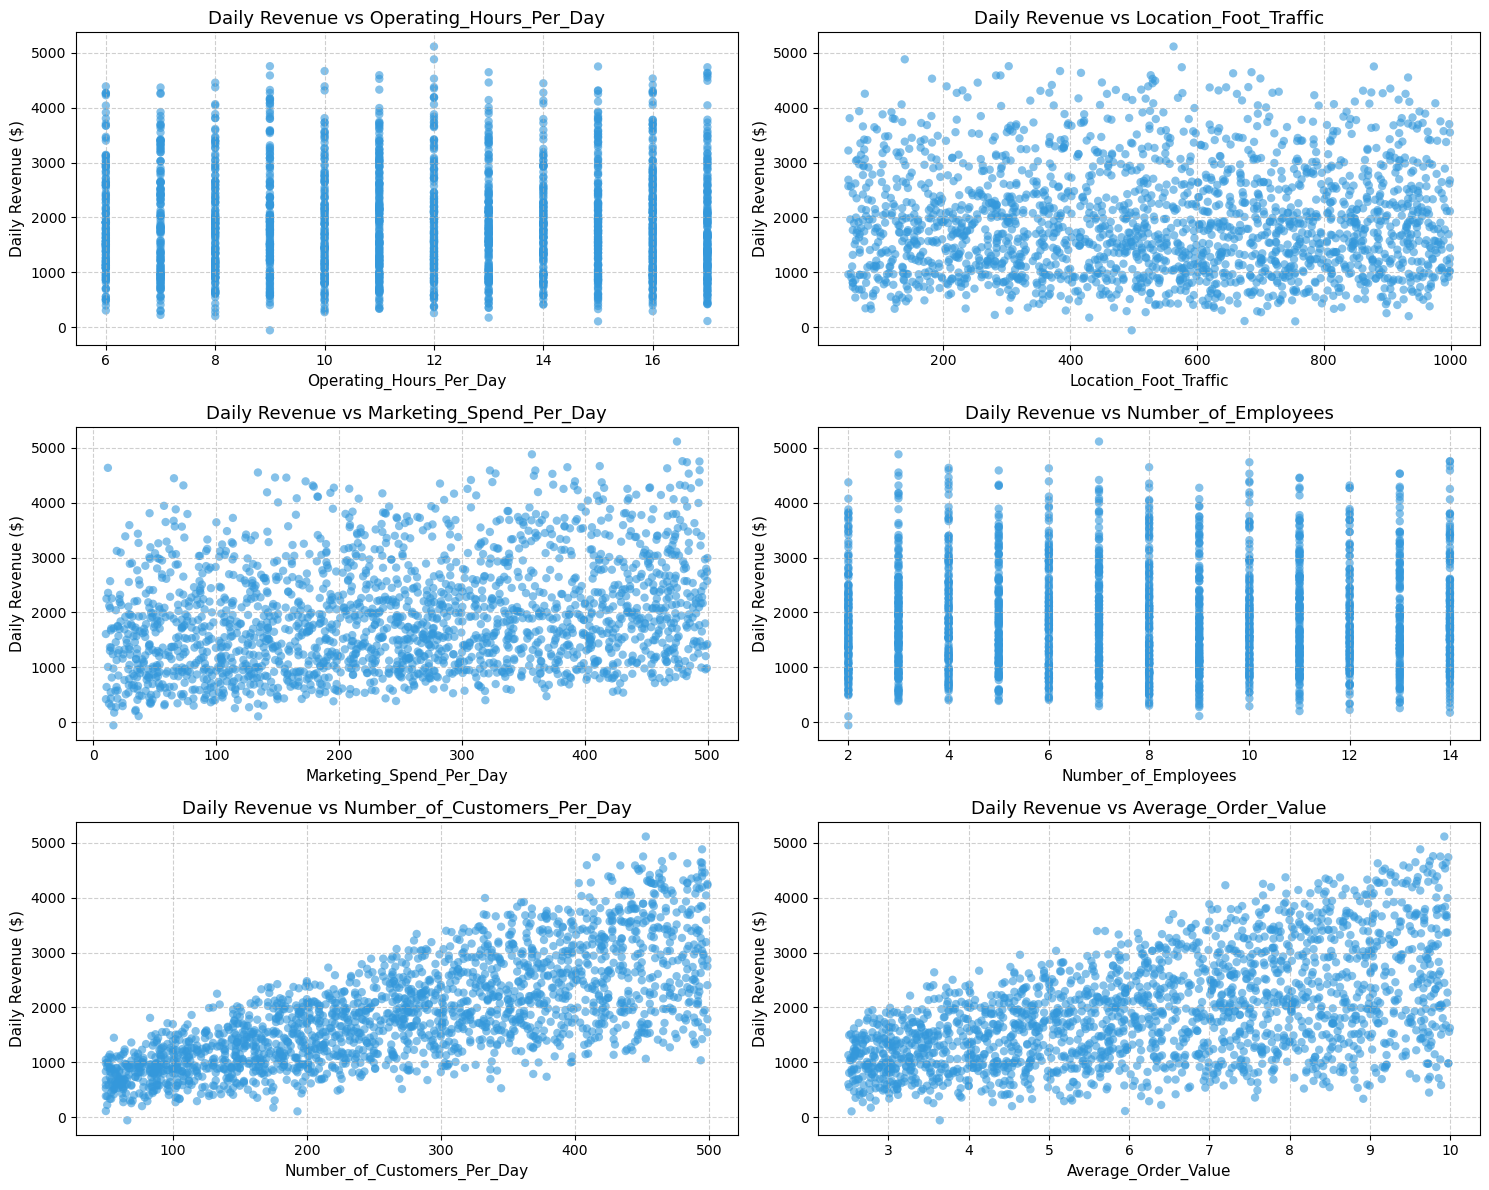

In [16]:
# scatter plot of revenue vs other features
features = ['Operating_Hours_Per_Day', 'Location_Foot_Traffic', 
            'Marketing_Spend_Per_Day', 'Number_of_Employees', 
            'Number_of_Customers_Per_Day','Average_Order_Value']

plt.figure(figsize=(15, 12))

for i, feat in enumerate(features, 1):
    plt.subplot(3, 2, i)  
    sns.scatterplot(data=df, x=feat, y='Daily_Revenue', 
                    color='#3498DB', alpha=0.6, edgecolor='none')
    plt.title(f'Daily Revenue vs {feat}', fontsize=13)
    plt.xlabel(feat, fontsize=11)
    plt.ylabel('Daily Revenue ($)', fontsize=11)
    plt.grid(linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

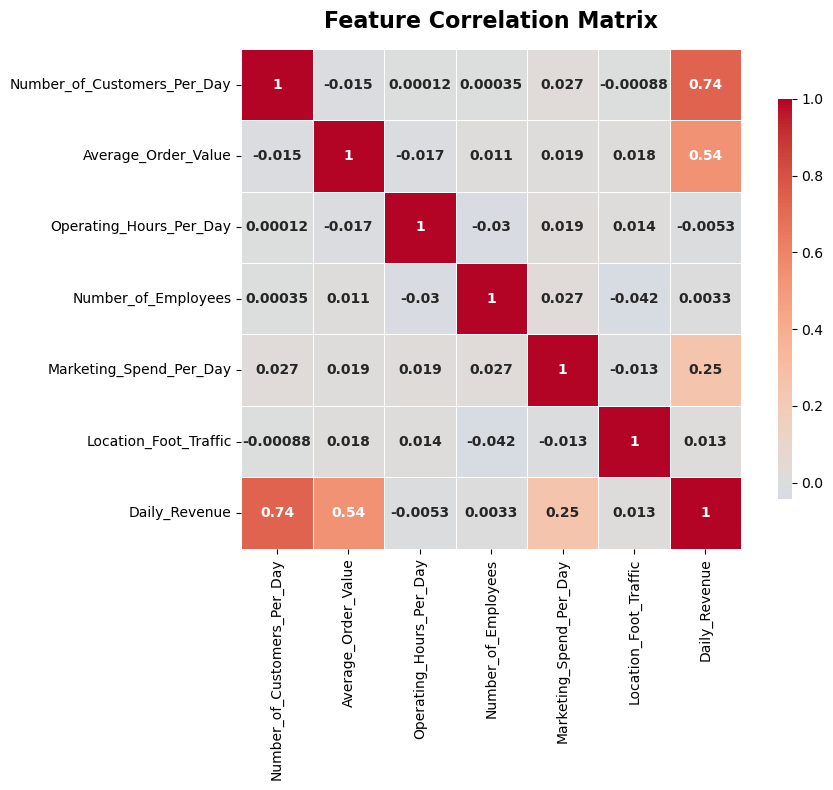

In [29]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "aspect": 30},
    annot_kws={"size": 10, "weight": "bold"}
)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

In [21]:
X = df.drop('Daily_Revenue', axis=1)
y = df['Daily_Revenue']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (2000, 6)
Target (y) shape: (2000,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [45]:
# random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [95]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")
# cross-validation
cv_scores = cross_val_score(rf_model, X, y, scoring='r2', cv=5)
print("cross-validation R²:", np.mean(cv_scores))


MSE: 47501.55
RMSE: 217.95
R²: 0.949
cross-validation R²: 0.9457313869263835


C:\Users\cheng\AppData\Local\Temp\ipykernel_7924\988746572.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


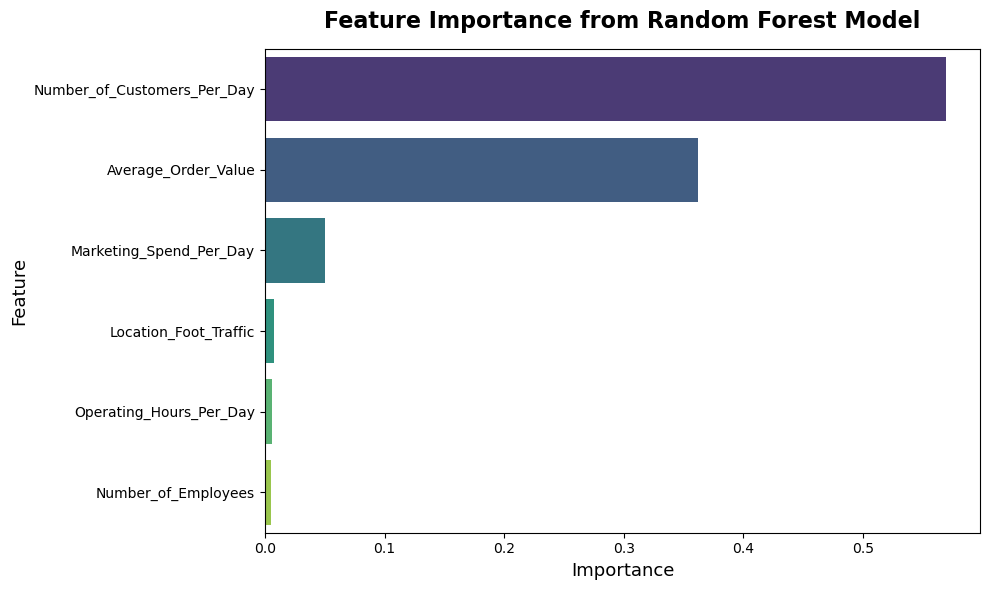

In [70]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df,
    palette='viridis'
)
plt.title('Feature Importance from Random Forest Model', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Importance', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.tight_layout()
plt.show()


In [ ]:
# Trying XGBoost model
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                         scoring='r2', cv=3, n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [200, 400, 600],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=2)

In [84]:
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-validated R²: {grid_search.best_score_:.3f}")


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-validated R²: 0.949


In [85]:
xgb_model = grid_search.best_estimator_
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.3f}")


XGBoost MSE: 45758.71
XGBoost RMSE: 213.91
XGBoost R²: 0.951


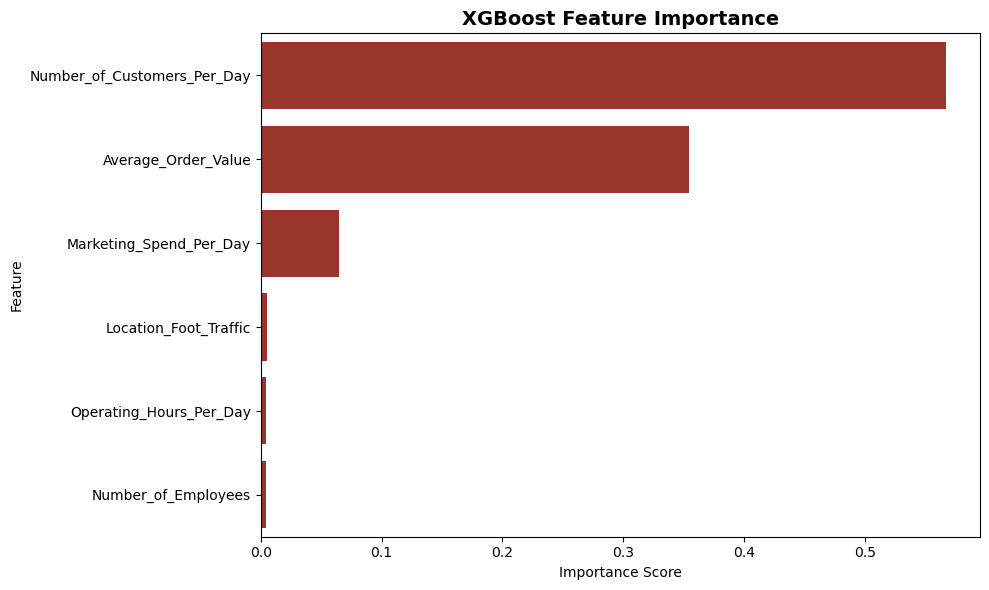

In [ ]:
feat_imp = sorted(zip(X.columns, xgb_model.feature_importances_), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10,6))
sns.barplot(x=[v for _,v in feat_imp], y=[k for k,_ in feat_imp], color="#AA2719")
plt.title("XGBoost Feature Importance", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [99]:
import joblib
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(xgb_model, "xgboost_model.pkl")
print("Models saved successfully")

Models saved successfully
